In [1]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('Salaries.csv')

In [3]:
dt

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
#Display head of dataset
dt.head(15)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [5]:
#Display tail of dataset
dt.tail(15)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
382,AssocProf,A,8,5,Male,86895
383,Prof,A,44,44,Male,105000
384,Prof,A,27,21,Male,125192
385,Prof,A,15,9,Male,114330
386,Prof,A,29,27,Male,139219
387,Prof,A,29,15,Male,109305
388,Prof,A,38,36,Male,119450
389,Prof,A,33,18,Male,186023
390,Prof,A,40,19,Male,166605
391,Prof,A,30,19,Male,151292


In [6]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (397, 6)


In [7]:
# Dataframe columns
dt.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
# To find types of data present in the dataset
dt.nunique()

rank               3
discipline         2
yrs.since.phd     53
yrs.service       52
sex                2
salary           371
dtype: int64

In [9]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column rank has ['Prof' 'AsstProf' 'AssocProf'] unique elements
****************************************************************************************************
This column discipline has ['B' 'A'] unique elements
****************************************************************************************************
This column yrs.since.phd has [19 20  4 45 40  6 30 21 18 12  7  1  2 38 37 39 31 36 34 24 13 35  5 11
 22 41  9 23 25 28 16 14 10  8  3 33 17 29 26 43 15 42 32 54 56 27 48 46
 47 52 51 49 44] unique elements
****************************************************************************************************
This column yrs.service has [18 16  3 39 41  6 23 45 20  8  2  1  0 34 36 26 31 30 19  4  9 21 27 38
 15 28 25 11  5 12 17 14 37  7 10 29 32 22 49 57 24 53 33 40 35 43 44 48
 46 51 13 60] unique elements
****************************************************************************************************
This column sex has ['Male' 'Female'] unique elements
*******

In [10]:
# Seeing for the null values in the dataset
dt.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

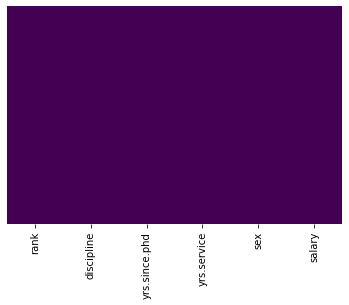

In [11]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [12]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [13]:
# To find the correlection in the dataset
dt.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [14]:
# Analysing the data 
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
yrs.since.phd,397.0,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,397.0,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
salary,397.0,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


<AxesSubplot:>

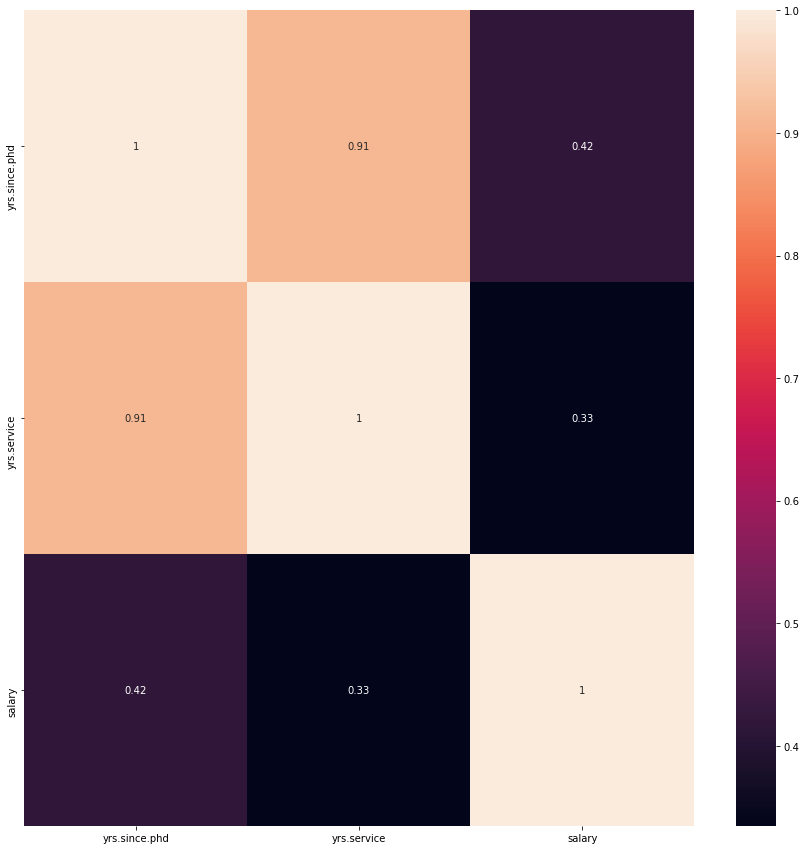

In [15]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [16]:
e['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

In [17]:
dt.drop_duplicates(keep='first',inplace=True)

In [18]:
# To see the skewness
dt.skew()

yrs.since.phd    0.295915
yrs.service      0.638491
salary           0.698471
dtype: float64

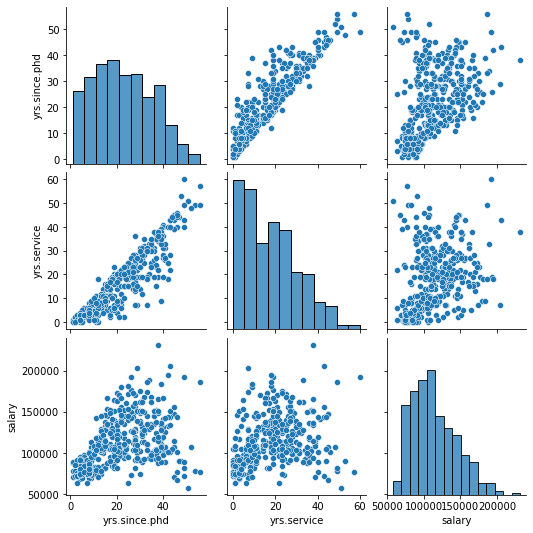

In [19]:
sns.pairplot(dt)

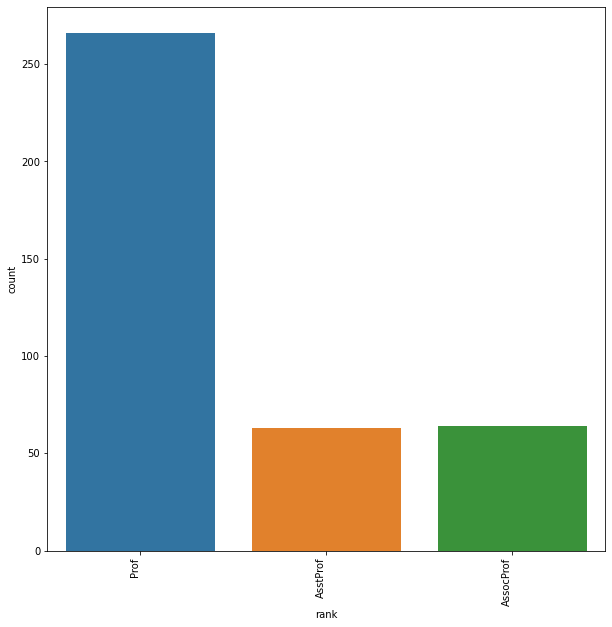

In [20]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['rank'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

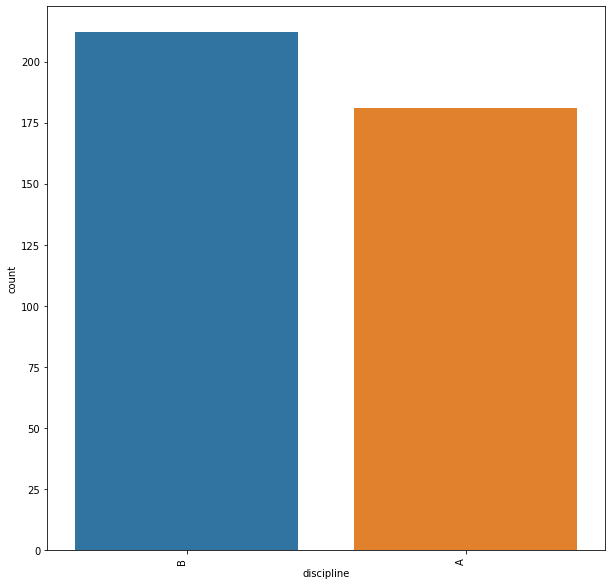

In [21]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['discipline'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

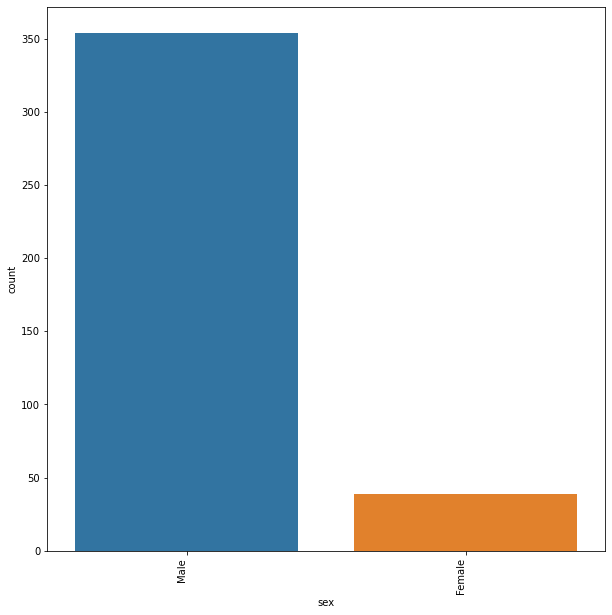

In [22]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['sex'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='sex'>

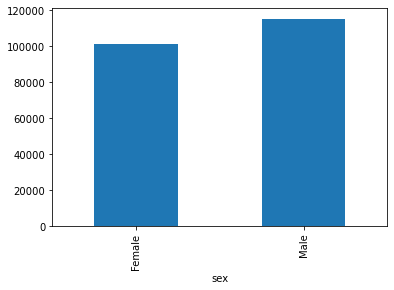

In [23]:
(dt.groupby('sex')['salary'].mean()).plot(kind='bar')

<AxesSubplot:xlabel='discipline'>

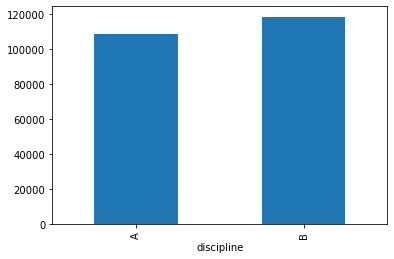

In [24]:
(dt.groupby('discipline')['salary'].mean()).plot(kind='bar')

<AxesSubplot:xlabel='yrs.since.phd'>

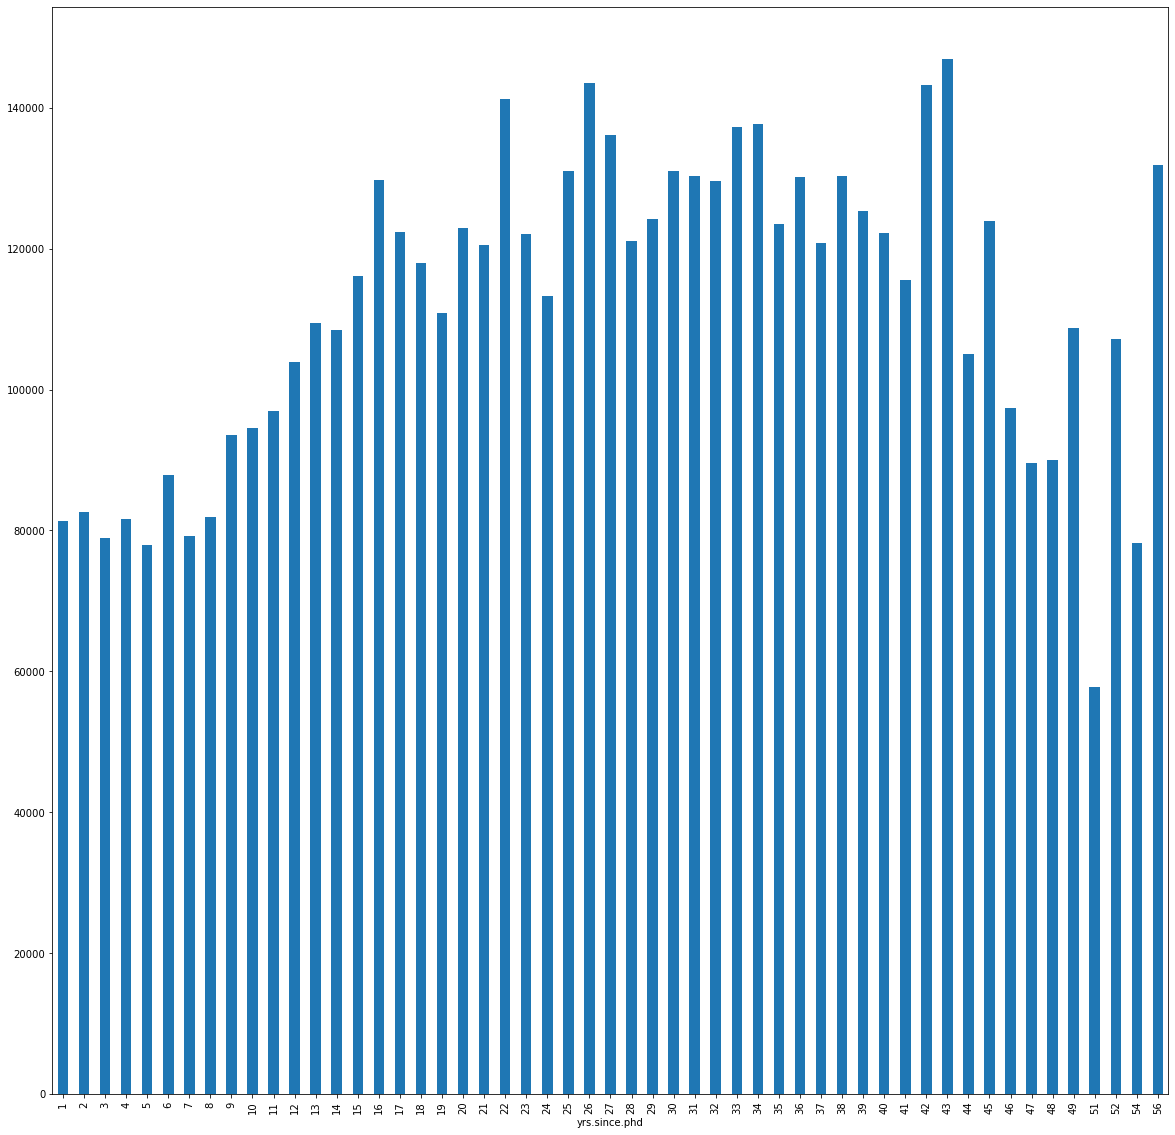

In [25]:
(dt.groupby('yrs.since.phd')['salary'].mean()).plot(kind='bar',figsize=(20,20))

<AxesSubplot:xlabel='yrs.service'>

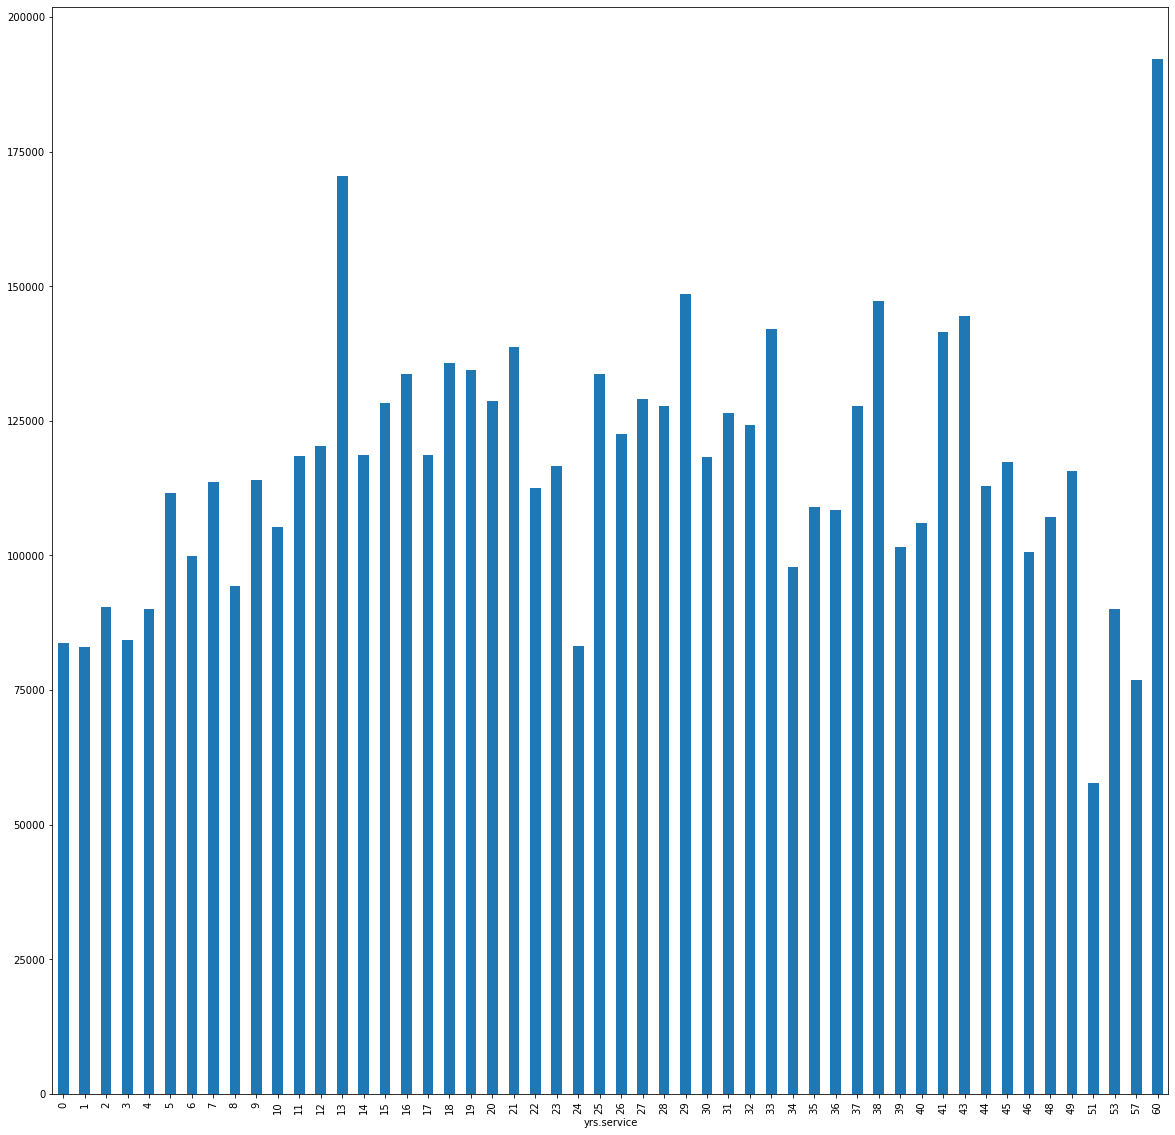

In [26]:
(dt.groupby('yrs.service')['salary'].mean()).plot(kind='bar',figsize=(20,20))

In [27]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [28]:
# Assigning to a variable
le=LabelEncoder()

In [29]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['rank']=le.fit_transform(dt['rank'])
dt['discipline']=le.fit_transform(dt['discipline'])
dt['sex']=le.fit_transform(dt['sex'])

In [30]:
dt

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [31]:
# Assignment of X and y
X=dt.drop(['salary'], axis=1)
y=dt.salary

In [32]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [33]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [34]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :-0.7467088863579452
At random state, 1, the testing accuracy is :0.3814221222135543


At random state, 2, the training accuracy is :-0.8929031769869802
At random state, 2, the testing accuracy is :0.4603027100693192


At random state, 3, the training accuracy is :-0.659366270631712
At random state, 3, the testing accuracy is :0.3222010238735178


At random state, 4, the training accuracy is :-0.6616658664803827
At random state, 4, the testing accuracy is :0.3173408626319568


At random state, 5, the training accuracy is :-0.5624939190147504
At random state, 5, the testing accuracy is :0.28935962552380146


At random state, 6, the training accuracy is :-0.659787042562191
At random state, 6, the testing accuracy is :0.33671429303919254


At random state, 7, the training accuracy is :-0.8575136653051278
At random state, 7, the testing accuracy is :0.4611235213571676


At random state, 8, the training accuracy is :-0.7067776156682632
At random 

In [35]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.7766691786241459
At random state, 1, the testing accuracy is :0.46924867975701756


At random state, 2, the training accuracy is :0.8031897781007409
At random state, 2, the testing accuracy is :0.3496601483244587


At random state, 3, the training accuracy is :0.8374310086269936
At random state, 3, the testing accuracy is :0.17572579091650542


At random state, 4, the training accuracy is :0.779273304217831
At random state, 4, the testing accuracy is :0.342577240467306


At random state, 5, the training accuracy is :0.8456869280174828
At random state, 5, the testing accuracy is :0.39153030381102927


At random state, 6, the training accuracy is :0.8005200579477871
At random state, 6, the testing accuracy is :0.26737725884881547


At random state, 7, the training accuracy is :0.7837394762373411
At random state, 7, the testing accuracy is :0.44786581756378674


At random state, 8, the training accuracy is :0.7853778444819182
At random state

In [36]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9091456795326736
At random state, 1, the testing accuracy is :0.32718561374259325


At random state 2, the training accuracy is :0.9329511014631056
At random state, 2, the testing accuracy is :0.09531339684777251


At random state 3, the training accuracy is :0.9379910698929905
At random state, 3, the testing accuracy is :-0.0179777888175654


At random state 4, the training accuracy is :0.9131944640995974
At random state, 4, the testing accuracy is :-0.18403701630887648


At random state 5, the training accuracy is :0.9546692856625807
At random state, 5, the testing accuracy is :0.1110627181807311


At random state 6, the training accuracy is :0.9300921433965612
At random state, 6, the testing accuracy is :-0.08301249765694219


At random state 7, the training accuracy is :0.9170453546323657
At random state, 7, the testing accuracy is :-0.0026675203367705347


At random state 8, the training accuracy is :0.9197837381736551
At random state

In [37]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9012182727669544
At random state, 1, the testing accuracy is :0.31962337791810624


At random state 2, the training accuracy is :0.9234202685364551
At random state, 2, the testing accuracy is :0.1014783184078758


At random state 3, the training accuracy is :0.9332971241090229
At random state, 3, the testing accuracy is :0.0044000983314371744


At random state 4, the training accuracy is :0.9077372094862909
At random state, 4, the testing accuracy is :0.2575789004311413


At random state 5, the training accuracy is :0.9472531091144791
At random state, 5, the testing accuracy is :0.23865261726168308


At random state 6, the training accuracy is :0.9227873360512096
At random state, 6, the testing accuracy is :0.1035007236264982


At random state 7, the training accuracy is :0.9101541820208808
At random state, 7, the testing accuracy is :0.2912975538754361


At random state 8, the training accuracy is :0.9118425258545904
At random state, 8, t

In [38]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.09482788688304944
At random state, 1, the testing accuracy is :0.5263638777443669


At random state, 2, the training accuracy is :0.059148055721590986
At random state, 2, the testing accuracy is :0.42731112151393325


At random state, 3, the training accuracy is :0.15254845350110635
At random state, 3, the testing accuracy is :0.3365187196722992


At random state, 4, the training accuracy is :0.22356407915494247
At random state, 4, the testing accuracy is :0.4161374145105423


At random state, 5, the training accuracy is :-0.07275805774414978
At random state, 5, the testing accuracy is :0.37510747916856413


At random state, 6, the training accuracy is :0.12890714530911307
At random state, 6, the testing accuracy is :0.449904735466956


At random state, 7, the training accuracy is :0.15838604099450393
At random state, 7, the testing accuracy is :0.33726523241788886


At random state, 8, the training accuracy is :0.10336182902653823
At ran

In [39]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.29989951604431975
At random state, 1, the testing accuracy is :0.47423083882760486


At random state 2, the training accuracy is :0.31524360276876406
At random state, 2, the testing accuracy is :0.39117418097350243


At random state 3, the training accuracy is :0.3974565577150584
At random state, 3, the testing accuracy is :0.33869244810083277


At random state 4, the training accuracy is :0.36958621447214735
At random state, 4, the testing accuracy is :0.4329964409844165


At random state 5, the training accuracy is :0.3866110424415319
At random state, 5, the testing accuracy is :0.45069151417581077


At random state 6, the training accuracy is :0.32188856780879493
At random state, 6, the testing accuracy is :0.4142867752735785


At random state 7, the training accuracy is :0.3001200520400439
At random state, 7, the testing accuracy is :0.5239892881470009


At random state 8, the training accuracy is :0.33824033334006054
At random state, 

In [40]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    gc=GradientBoostingRegressor()
    gc.fit(x_train, y_train)
    predtrain=gc.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.529957580183128
At random state, 1, the testing accuracy is :0.5069389368089496


At random state, 2, the training accuracy is :0.569865627478623
At random state, 2, the testing accuracy is :0.5167055462678798


At random state, 3, the training accuracy is :0.6091951173097772
At random state, 3, the testing accuracy is :0.3688378616957685


At random state, 4, the training accuracy is :0.5632161709418142
At random state, 4, the testing accuracy is :0.44670091784136223


At random state, 5, the training accuracy is :0.5796047369445287
At random state, 5, the testing accuracy is :0.393240056904552


At random state, 6, the training accuracy is :0.5569457131064639
At random state, 6, the testing accuracy is :0.44356157839104793


At random state, 7, the training accuracy is :0.5378243254260104
At random state, 7, the testing accuracy is :0.49746610673246383


At random state, 8, the training accuracy is :0.5153479660451241
At random state, 8

In [41]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-1447068.5252570522
At random state, 1, the testing accuracy is :-0.004852356360770527


At random state 2, the training accuracy is :-1392908.325724527
At random state, 2, the testing accuracy is :-0.07197109452374528


At random state 3, the training accuracy is :-1227780.837249308
At random state, 3, the testing accuracy is :-0.026722932301652014


At random state 4, the training accuracy is :-1165273.873299997
At random state, 4, the testing accuracy is :-0.12491202170599336


At random state 5, the training accuracy is :-1269600.265175487
At random state, 5, the testing accuracy is :9.913599939603834e-05


At random state 6, the training accuracy is :-1283826.3481302557
At random state, 6, the testing accuracy is :-0.03198831850777162


At random state 7, the training accuracy is :-1368614.1677717364
At random state, 7, the testing accuracy is :-0.030971346959841384


At random state 8, the training accuracy is :-1570803.9964890266
At r

In [42]:
# Importing PCA components
from sklearn.decomposition import PCA

In [43]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 0.0217582 , -0.97405156,  0.46829203, -0.47966753, -0.22593027],
       [-0.02176221, -0.97282872,  0.45578653, -0.52168596, -0.06458959],
       [-1.97866093, -0.90842048, -0.10222197, -0.14237013, -0.18628891],
       ...,
       [ 1.81646236,  0.5631461 , -0.54922837, -0.04944342,  0.63495529],
       [ 0.54573339,  0.48186429, -0.82462213, -0.72793297,  0.18728496],
       [-1.36764491,  0.54504969, -1.37012514, -0.30659871, -0.09575504]])

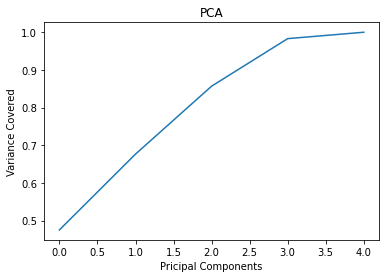

In [44]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [45]:
pca=PCA(n_components=4)
new_pcomp=pca.fit_transform(X_scaled)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4'])

In [46]:
prin_comp

,PC1,PC2,PC3,PC4
0,0.021758,-0.974052,0.468292,-0.479668
1,-0.021762,-0.972829,0.455787,-0.521686
2,-1.978661,-0.908420,-0.102222,-0.142370
3,2.225956,-0.841893,0.952764,0.738640
4,2.077999,-0.859006,0.926567,0.695495
...,...,...,...,...
388,1.614112,0.534267,-0.580857,-0.082787
389,1.015729,0.511199,-0.722205,-0.473570
390,1.816462,0.563146,-0.549228,-0.049443
391,0.545733,0.481864,-0.824622,-0.727933


In [47]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :-0.8679215504837792
At random state, 1, the testing accuracy is :0.34365874768018556


At random state, 2, the training accuracy is :-1.0535314430426133
At random state, 2, the testing accuracy is :0.4238705361294387


At random state, 3, the training accuracy is :-0.740288686167643
At random state, 3, the testing accuracy is :0.26490315776019124


At random state, 4, the training accuracy is :-0.732428347378772
At random state, 4, the testing accuracy is :0.26340616099602165


At random state, 5, the training accuracy is :-0.830882369671958
At random state, 5, the testing accuracy is :0.32096408733828274


At random state, 6, the training accuracy is :-0.7622180776509959
At random state, 6, the testing accuracy is :0.2838625056161902


At random state, 7, the training accuracy is :-1.0415141580445137
At random state, 7, the testing accuracy is :0.437143324463783


At random state, 8, the training accuracy is :-0.8952390338868097
At random 

In [48]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.7809448309589637
At random state, 1, the testing accuracy is :0.49937892438258524


At random state, 2, the training accuracy is :0.8035670129493663
At random state, 2, the testing accuracy is :0.41154114668564323


At random state, 3, the training accuracy is :0.8334867703937967
At random state, 3, the testing accuracy is :0.14883980181181444


At random state, 4, the training accuracy is :0.7690766409228549
At random state, 4, the testing accuracy is :0.40385207802569645


At random state, 5, the training accuracy is :0.8391912510030831
At random state, 5, the testing accuracy is :0.4577212175238947


At random state, 6, the training accuracy is :0.8141131899784314
At random state, 6, the testing accuracy is :0.2741542115467237


At random state, 7, the training accuracy is :0.7735476633052938
At random state, 7, the testing accuracy is :0.5208483169851911


At random state, 8, the training accuracy is :0.7950085205172319
At random stat

In [49]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9091456795326736
At random state, 1, the testing accuracy is :0.27951632237333957


At random state 2, the training accuracy is :0.9329511014631056
At random state, 2, the testing accuracy is :0.1894575937907922


At random state 3, the training accuracy is :0.9379910698929905
At random state, 3, the testing accuracy is :-0.22936841507155203


At random state 4, the training accuracy is :0.9131944640995974
At random state, 4, the testing accuracy is :0.07857423365563276


At random state 5, the training accuracy is :0.9546692856625807
At random state, 5, the testing accuracy is :0.23766714870893446


At random state 6, the training accuracy is :0.9300921433965612
At random state, 6, the testing accuracy is :0.023034833298344104


At random state 7, the training accuracy is :0.9170453546323657
At random state, 7, the testing accuracy is :0.20667118737832835


At random state 8, the training accuracy is :0.9197837381736551
At random state, 8

In [50]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9043986163089737
At random state, 1, the testing accuracy is :0.41810484385575064


At random state 2, the training accuracy is :0.928188522091447
At random state, 2, the testing accuracy is :0.3452728939547143


At random state 3, the training accuracy is :0.9346292785756181
At random state, 3, the testing accuracy is :-0.13197711273396862


At random state 4, the training accuracy is :0.9087806780049535
At random state, 4, the testing accuracy is :0.2778144076057274


At random state 5, the training accuracy is :0.9511430302413808
At random state, 5, the testing accuracy is :0.5024214382290072


At random state 6, the training accuracy is :0.9272910817327548
At random state, 6, the testing accuracy is :0.13044543763858218


At random state 7, the training accuracy is :0.9137413456965441
At random state, 7, the testing accuracy is :0.3811071219937019


At random state 8, the training accuracy is :0.9147111073786582
At random state, 8, the

In [52]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.06854598510909438
At random state, 1, the testing accuracy is :0.5019259534477136


At random state, 2, the training accuracy is :0.037742575268716605
At random state, 2, the testing accuracy is :0.45942257340930115


At random state, 3, the training accuracy is :0.19307692571646584
At random state, 3, the testing accuracy is :0.28827845634235405


At random state, 4, the training accuracy is :0.18143411456994185
At random state, 4, the testing accuracy is :0.4131794764328478


At random state, 5, the training accuracy is :-0.033392036935818936
At random state, 5, the testing accuracy is :0.34918970631617663


At random state, 6, the training accuracy is :0.022927124162243517
At random state, 6, the testing accuracy is :0.38763160135652874


At random state, 7, the training accuracy is :0.10240932441956896
At random state, 7, the testing accuracy is :0.46765234597022565


At random state, 8, the training accuracy is :0.09163959851797243
A

In [53]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.2960600237551725
At random state, 1, the testing accuracy is :0.484097937317453


At random state 2, the training accuracy is :0.37900355481648706
At random state, 2, the testing accuracy is :0.31490900267536526


At random state 3, the training accuracy is :0.41610723612340184
At random state, 3, the testing accuracy is :0.25764612448702084


At random state 4, the training accuracy is :0.342555256840541
At random state, 4, the testing accuracy is :0.5268260162690134


At random state 5, the training accuracy is :0.4047922115615328
At random state, 5, the testing accuracy is :0.4516159113368535


At random state 6, the training accuracy is :0.3268812106896316
At random state, 6, the testing accuracy is :0.39481124320639593


At random state 7, the training accuracy is :0.2751016761275298
At random state, 7, the testing accuracy is :0.5851330849036558


At random state 8, the training accuracy is :0.3205945966766389
At random state, 8, the

In [54]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    gc=GradientBoostingRegressor()
    gc.fit(x_train, y_train)
    predtrain=gc.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.5923077238357892
At random state, 1, the testing accuracy is :0.6007844601379922


At random state, 2, the training accuracy is :0.6239665292291773
At random state, 2, the testing accuracy is :0.4718603076366771


At random state, 3, the training accuracy is :0.6499227788363533
At random state, 3, the testing accuracy is :0.4024326068398718


At random state, 4, the training accuracy is :0.599104877339188
At random state, 4, the testing accuracy is :0.4716059385539375


At random state, 5, the training accuracy is :0.6146857145560176
At random state, 5, the testing accuracy is :0.476614823363525


At random state, 6, the training accuracy is :0.6232816861429034
At random state, 6, the testing accuracy is :0.4152087639372547


At random state, 7, the training accuracy is :0.5911814842778319
At random state, 7, the testing accuracy is :0.484129613183076


At random state, 8, the training accuracy is :0.5636845839603362
At random state, 8, t

In [55]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-1358602.2433274803
At random state, 1, the testing accuracy is :-0.004817015742340169


At random state 2, the training accuracy is :-1310697.3122328226
At random state, 2, the testing accuracy is :-0.07192542782987843


At random state 3, the training accuracy is :-1153984.8142269044
At random state, 3, the testing accuracy is :-0.02666837058372451


At random state 4, the training accuracy is :-1095109.667107472
At random state, 4, the testing accuracy is :-0.12483652765739706


At random state 5, the training accuracy is :-1187130.9788251042
At random state, 5, the testing accuracy is :0.0001291256999870205


At random state 6, the training accuracy is :-1203211.8595033528
At random state, 6, the testing accuracy is :-0.03193171473474865


At random state 7, the training accuracy is :-1285286.999847179
At random state, 7, the testing accuracy is :-0.030923845628126445


At random state 8, the training accuracy is :-1468628.3331487263
At 

In [56]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('Salaries.csv')

In [57]:
dt

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [58]:
df=pd.get_dummies(dt,columns=['rank','discipline','sex'],drop_first=True)

In [59]:
# Assignment of X and y
X=df.drop(['salary'], axis=1)
y=df.salary

In [60]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [61]:
# Importing PCA components
from sklearn.decomposition import PCA

In [62]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 0.32466842, -0.9881416 ,  0.53428209, -0.46681707, -0.23462795,
        -0.26337412],
       [ 0.2883042 , -0.98752867,  0.5328652 , -0.52387424, -0.24973183,
        -0.10546708],
       [-3.078593  , -0.77647483, -0.40190048,  0.85124218, -0.47350623,
        -0.05038134],
       ...,
       [ 1.83324061,  0.61241151, -0.69266646,  0.11914508, -0.13670005,
         0.64171522],
       [ 0.73922315,  0.51135554, -0.72924855, -0.81259265, -0.24752989,
         0.14332665],
       [-2.59130984,  0.72179646, -1.66259735,  0.61958094, -0.45620041,
         0.04050536]])

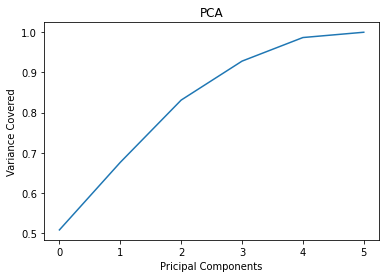

In [63]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [64]:
pca=PCA(n_components=5)
new_pcomp=pca.fit_transform(X_scaled)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5'])

In [65]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :-0.3095826969279105
At random state, 1, the testing accuracy is :0.5158200459502509


At random state, 2, the training accuracy is :-0.20626470201575997
At random state, 2, the testing accuracy is :0.4259426090362677


At random state, 3, the training accuracy is :-0.11511299312561096
At random state, 3, the testing accuracy is :0.36070561314462135


At random state, 4, the training accuracy is :-0.1686638527167077
At random state, 4, the testing accuracy is :0.3842914163347553


At random state, 5, the training accuracy is :-0.15157338915873986
At random state, 5, the testing accuracy is :0.37864076944950564


At random state, 6, the training accuracy is :-0.28133878591211436
At random state, 6, the testing accuracy is :0.49818025676490074


At random state, 7, the training accuracy is :-0.28563658723233676
At random state, 7, the testing accuracy is :0.49299826826344173


At random state, 8, the training accuracy is :-0.21966872428660977


In [66]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.7979839503077202
At random state, 1, the testing accuracy is :0.2316584227413665


At random state, 2, the training accuracy is :0.7996484030350393
At random state, 2, the testing accuracy is :0.4151783619486401


At random state, 3, the training accuracy is :0.8073784683669214
At random state, 3, the testing accuracy is :0.327848374298657


At random state, 4, the training accuracy is :0.7955156305861476
At random state, 4, the testing accuracy is :0.4098616399038796


At random state, 5, the training accuracy is :0.8468684470059364
At random state, 5, the testing accuracy is :0.3823554269051177


At random state, 6, the training accuracy is :0.8018806868957008
At random state, 6, the testing accuracy is :0.46607955468548923


At random state, 7, the training accuracy is :0.8041554788546657
At random state, 7, the testing accuracy is :0.12017885659491967


At random state, 8, the training accuracy is :0.8145805305883153
At random state, 

In [67]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9235417579531182
At random state, 1, the testing accuracy is :-0.2732280261431823


At random state 2, the training accuracy is :0.9209626680812113
At random state, 2, the testing accuracy is :0.07720198673253609


At random state 3, the training accuracy is :0.9216614206091887
At random state, 3, the testing accuracy is :-0.04749990760624345


At random state 4, the training accuracy is :0.9240044782564019
At random state, 4, the testing accuracy is :-0.09255221368856414


At random state 5, the training accuracy is :0.9600641553681173
At random state, 5, the testing accuracy is :-0.020318545592781456


At random state 6, the training accuracy is :0.9172795480704017
At random state, 6, the testing accuracy is :0.11014664526392681


At random state 7, the training accuracy is :0.9240740142607222
At random state, 7, the testing accuracy is :0.024562610880388802


At random state 8, the training accuracy is :0.9302640273591364
At random stat

In [68]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9212046749527973
At random state, 1, the testing accuracy is :0.023594360703156125


At random state 2, the training accuracy is :0.9179312219440836
At random state, 2, the testing accuracy is :0.3834047752407709


At random state 3, the training accuracy is :0.9194261934165331
At random state, 3, the testing accuracy is :0.24491419605392295


At random state 4, the training accuracy is :0.9216750665223783
At random state, 4, the testing accuracy is :0.24695965086256688


At random state 5, the training accuracy is :0.9581944842384967
At random state, 5, the testing accuracy is :0.3040393401437501


At random state 6, the training accuracy is :0.9152183093855344
At random state, 6, the testing accuracy is :0.3158416118262407


At random state 7, the training accuracy is :0.9224578260659679
At random state, 7, the testing accuracy is :-0.29599638627567715


At random state 8, the training accuracy is :0.9277981546353999
At random state, 8, 

In [69]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.050829700617813556
At random state, 1, the testing accuracy is :0.46260655228625114


At random state, 2, the training accuracy is :0.14235392102330813
At random state, 2, the testing accuracy is :0.34663070676554897


At random state, 3, the training accuracy is :0.05226598043715758
At random state, 3, the testing accuracy is :0.32984898831526854


At random state, 4, the training accuracy is :0.11726867552821973
At random state, 4, the testing accuracy is :0.45229131585967053


At random state, 5, the training accuracy is :0.04702694151668996
At random state, 5, the testing accuracy is :0.33654195135809095


At random state, 6, the training accuracy is :0.1663556574266718
At random state, 6, the testing accuracy is :0.4852486726023497


At random state, 7, the training accuracy is :0.10254700721708676
At random state, 7, the testing accuracy is :0.20775605330585434


At random state, 8, the training accuracy is :0.08237475961309437
At r

In [70]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.32935797199494166
At random state, 1, the testing accuracy is :0.29925626611329537


At random state 2, the training accuracy is :0.3237158653463009
At random state, 2, the testing accuracy is :0.4005433311699068


At random state 3, the training accuracy is :0.3771150602807155
At random state, 3, the testing accuracy is :0.27627211977843114


At random state 4, the training accuracy is :0.26620228650359357
At random state, 4, the testing accuracy is :0.4559964990858919


At random state 5, the training accuracy is :0.3357702443622975
At random state, 5, the testing accuracy is :0.4270663037129947


At random state 6, the training accuracy is :0.2656193527481434
At random state, 6, the testing accuracy is :0.46217593060775075


At random state 7, the training accuracy is :0.3377810910125838
At random state, 7, the testing accuracy is :0.3617224894884268


At random state 8, the training accuracy is :0.3163974217047488
At random state, 8, t

In [71]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    gc=GradientBoostingRegressor()
    gc.fit(x_train, y_train)
    predtrain=gc.predict(x_train)
    predtest=gc.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.6786633377333442
At random state, 1, the testing accuracy is :0.37946686603491486


At random state, 2, the training accuracy is :0.6883925260082242
At random state, 2, the testing accuracy is :0.4039973006891968


At random state, 3, the training accuracy is :0.6868757556806143
At random state, 3, the testing accuracy is :0.33569538583743785


At random state, 4, the training accuracy is :0.6763262329522646
At random state, 4, the testing accuracy is :0.4202222775688088


At random state, 5, the training accuracy is :0.6921540520538216
At random state, 5, the testing accuracy is :0.45222238445347307


At random state, 6, the training accuracy is :0.7005623213903057
At random state, 6, the testing accuracy is :0.4449378894200102


At random state, 7, the training accuracy is :0.6710159293535447
At random state, 7, the testing accuracy is :0.16230239815115488


At random state, 8, the training accuracy is :0.6802258464156727
At random stat

In [72]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-1074117.075897964
At random state, 1, the testing accuracy is :-0.08658770122296056


At random state 2, the training accuracy is :-1016080.1154967073
At random state, 2, the testing accuracy is :-0.0320744590604245


At random state 3, the training accuracy is :-983773.741695424
At random state, 3, the testing accuracy is :-0.04649608471510702


At random state 4, the training accuracy is :-894255.1540104724
At random state, 4, the testing accuracy is :-0.09480493770503351


At random state 5, the training accuracy is :-958077.1518484452
At random state, 5, the testing accuracy is :0.0002339708859623313


At random state 6, the training accuracy is :-1059898.9858732084
At random state, 6, the testing accuracy is :-0.08093679968439549


At random state 7, the training accuracy is :-923416.8860024322
At random state, 7, the testing accuracy is :-0.051642066114794494


At random state 8, the training accuracy is :-1150641.4884079986
At random

In [128]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=207)
g=RandomForestRegressor()
g.fit(x_train, y_train)
predtrain=g.predict(x_train)
predtest=g.predict(x_test)
print(f"At random state, {207}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {207}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, 207, the training accuracy is :0.7513560866072504
At random state, 207, the testing accuracy is :0.6140722158511978


In [123]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 14317.913257440476
The MSE is 14317.913257440476 and RMSE is 119.65748308167139


In [124]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators' : range(5,10),
           'max_depth': range(5,15),
           'min_samples_split': range(2,15),
           'min_samples_leaf':range(2,15) }

In [125]:
c=GridSearchCV(RandomForestRegressor(),param_grid=parameters)
c.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(5, 15),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 15),
                         'n_estimators': range(5, 10)})

In [126]:
c.best_params_

{'max_depth': 5,
 'min_samples_leaf': 14,
 'min_samples_split': 9,
 'n_estimators': 5}

In [156]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=207)
g=RandomForestRegressor(max_depth=5, min_samples_leaf=14, min_samples_split=9, n_estimators=5)
g.fit(x_train, y_train)
predtrain=g.predict(x_train)
predtest=g.predict(x_test)
print(f"At random state, {207}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {207}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, 207, the training accuracy is :0.7635497113684994
At random state, 207, the testing accuracy is :0.6184619355832084


In [ ]:
#pickling
import pickle
filename = 'sp'
outfile = open(filename,'sp')
pickle.dump(sp_dict,outfile)
outfile.close()

# Conclusion
The maximum prediction score achieved is in Random forest regressor. At random state, 207, the training accuracy is :0.7635497113684994, At random state, 207, the testing accuracy is :0.6184619355832084